## Getting Started

In [1]:
from __future__ import print_function
import torch

In [2]:
x = torch.Tensor(5,3)
print(x)


-3.0096e-10  3.0669e-41  1.2525e-19
 4.5632e-41  1.2621e-19  4.5632e-41
 1.2622e-19  4.5632e-41  1.2621e-19
 4.5632e-41  1.2621e-19  4.5632e-41
 1.2621e-19  4.5632e-41  1.2621e-19
[torch.FloatTensor of size 5x3]



In [3]:
x = torch.rand(5,3)
print(x)


 0.6417  0.7382  0.8034
 0.5243  0.8993  0.2046
 0.8808  0.9809  0.6248
 0.4265  0.4793  0.2930
 0.3918  0.8515  0.2985
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size())

torch.Size([5, 3])


In [5]:
y = torch.rand(5,3)
print(x+y)


 1.3883  1.5252  1.7687
 1.1337  1.8921  0.2104
 1.0136  0.9884  1.0818
 1.3723  0.9583  0.9213
 0.7690  1.1027  0.6300
[torch.FloatTensor of size 5x3]



In [6]:
print(torch.add(x,y))


 1.3883  1.5252  1.7687
 1.1337  1.8921  0.2104
 1.0136  0.9884  1.0818
 1.3723  0.9583  0.9213
 0.7690  1.1027  0.6300
[torch.FloatTensor of size 5x3]



In [8]:
result = torch.Tensor(5,3)
torch.add(x,y, out=result)
print(result)


 1.3883  1.5252  1.7687
 1.1337  1.8921  0.2104
 1.0136  0.9884  1.0818
 1.3723  0.9583  0.9213
 0.7690  1.1027  0.6300
[torch.FloatTensor of size 5x3]



In [9]:
y.add_(x)


 1.3883  1.5252  1.7687
 1.1337  1.8921  0.2104
 1.0136  0.9884  1.0818
 1.3723  0.9583  0.9213
 0.7690  1.1027  0.6300
[torch.FloatTensor of size 5x3]

In [10]:
#converting numpy Array to torch Tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [11]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x+y

## Autograd

In [12]:
from torch.autograd import Variable

In [13]:
x = Variable(torch.ones(2,2), requires_grad = True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [14]:
y = x+2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [15]:
print(y.grad_fn)

In [16]:
z = y*y*3
out = z.mean()

print(z,out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [17]:
out.backward()

In [18]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [19]:
x = torch.rand(3)
x = Variable(x, requires_grad = True)

y = x*2
while y.data.norm()<1000:
    y = y*2

print(y)

Variable containing:
   65.1221
 1895.5093
  246.9707
[torch.FloatTensor of size 3]



In [20]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  204.8000
 2048.0000
    0.2048
[torch.FloatTensor of size 3]



## Neural Network

In [21]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [28]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        #1 input image channel, 6 output channel, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        #affine funtions y=Wx+b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        #Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        #if the size is a square specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [29]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [30]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [31]:
input_ = Variable(torch.randn(1, 1, 32, 32))
out = net(input_)
print(out)

Variable containing:
-0.0540  0.1075 -0.0314 -0.0103  0.0448  0.0442 -0.0505  0.0888 -0.0124 -0.0183
[torch.FloatTensor of size 1x10]



In [32]:
net.zero_grad()
out.backward(torch.randn(1,10))

##### Loss function

In [33]:
output = net(input_)
target = Variable(torch.arange(1,11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


Variable containing:
 38.3876
[torch.FloatTensor of size 1]



In [35]:
print(loss.grad_fn)#MSELoss
print(loss.grad_fn.next_functions[0][0])#Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])#ReLu

In [36]:
net.zero_grad() #zeros the gradient buffer of all the parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  5.2567
 -3.9596
 -4.1425
 -9.9530
  4.9533
 -7.3627
[torch.FloatTensor of size 6]



##### Update the weights

In [37]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

##### different update rules

In [38]:
import torch.optim as optim

#create the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

#in training loop
optimizer.zero_grad() #zero the gradient buffer
output = net(input_)
loss = criterion(output, target)
loss.backward()
optimizer.step() #does the update

## Training the Image Classifier

- For images, packages such as Pillow, OpenCV are useful.
- For audio, packages such as scipy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

#### Loading the CIFAR10

In [39]:
import torch
import torchvision
import torchvision.transforms as transforms

In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


#### Show some images

truck	 deer	 ship	 ship


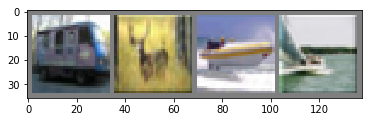

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
#get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print("\t".join('%5s'%classes[labels[j]] for j in range(4)))

#### Define the CNN

In [54]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

#### Define the loss function and optimizer

Using Classification Cross-Entropy loss with SGD with momentum

In [56]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

#### Train the network

In [59]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data
        
        #wrap them in Variables
        inputs, labels = Variable(inputs), Variable(labels)
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward+backward+optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print the statistics
        running_loss += loss.data[0]
        if i%2000 == 1999:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0

print("Finished Training")

[1, 2000] loss: 1.975
[1, 4000] loss: 1.941
[1, 6000] loss: 1.923
[1, 8000] loss: 1.940
[1,10000] loss: 1.931
[1,12000] loss: 1.948
[2, 2000] loss: 1.967
[2, 4000] loss: 1.960
[2, 6000] loss: 1.956
[2, 8000] loss: 1.969
[2,10000] loss: 1.990
[2,12000] loss: 1.980
Finished Training


#### Test the network on the test data

GroundTruth:    cat  ship  ship plane


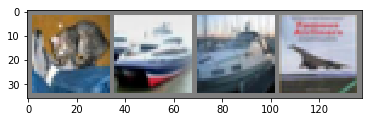

In [60]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: "," ".join("%5s"%classes[labels[j]] for j in range(4)))

In [61]:
outputs = net(Variable(images))

In [62]:
_, predicted = torch.max(outputs.data, 1)
print("Predicted: "," ".join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:   deer  ship  ship  ship


In [63]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum()
    
print("Accuracy of the network on 10k test images : %d %%"%((100.0*correct)/total))

Accuracy of the network on 10k test images : 25 %


In [64]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  9 %
Accuracy of   car : 51 %
Accuracy of  bird :  3 %
Accuracy of   cat : 23 %
Accuracy of  deer : 69 %
Accuracy of   dog : 18 %
Accuracy of  frog :  4 %
Accuracy of horse : 28 %
Accuracy of  ship : 31 %
Accuracy of truck : 19 %
